<div style="text-align:center; font-size: 30px">FEATURE AGGREGATION</div>

In [15]:
# Import libraries
import os
import numpy as np
import pandas as pd

from glob import glob

import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
from scipy.stats import skew, kurtosis
from tqdm import tqdm

In [2]:
# Paths to variables
blues_files = glob("../audio-ml/Data/genres_original/blues/blues.*.wav")

classical_files = glob("../audio-ml/Data/genres_original/classical/classical.*.wav")

country_files = glob("../audio-ml/Data/genres_original/country/country.*.wav")

disco_files = glob("../audio-ml/Data/genres_original/disco/disco.*.wav")

hiphop_files = glob("../audio-ml/Data/genres_original/hiphop/hiphop.*.wav")

jazz_files = glob("../audio-ml/Data/genres_original/jazz/jazz.*.wav")

metal_files = glob("../audio-ml/Data/genres_original/metal/metal.*.wav")

pop_files = glob("../audio-ml/Data/genres_original/pop/pop.*.wav")

reggae_files = glob("../audio-ml/Data/genres_original/reggae/reggae.*.wav")

rock_files = glob("../audio-ml/Data/genres_original/rock/rock.*.wav")

In [26]:
# All files in a list along with genre in a tuple
file_list = []
# Iteration
for path in classical_files:
    file_list.append((path, "classical"))
for path in blues_files:
    file_list.append((path, "blues"))
for path in country_files:
    file_list.append((path, "country"))
for path in disco_files:
    file_list.append((path, "disco"))
for path in hiphop_files:
    file_list.append((path, "hiphop"))
for path in jazz_files:
    file_list.append((path, "jazz"))
for path in metal_files:
    file_list.append((path, "metal"))
for path in pop_files:
    file_list.append((path, "pop"))
for path in reggae_files:
    file_list.append((path, "reggae"))
for path in rock_files:
    file_list.append((path, "rock"))

In [14]:
# Feature extraction function
def extract_features(audio_path):
    # Load file
    y, _ = librosa.load(audio_path)
    
    # Initialize feature dict
    features = {}
    
    # Calculate RMS Energy and extract features
    rms = librosa.feature.rms(y=y, frame_length=2048, hop_length=512)[0]
    features["rms_mean"] = np.mean(rms)
    features["rms_std"] = np.std(rms)
    features["rms_max"] = np.max(rms)
    features["rms_min"] = np.min(rms)
    features["rms_skew"] = skew(rms)
    features["rms_kurtosis"] = kurtosis(rms)
    
    # Calculate Zero Crossing Rate and extract features
    zcr = librosa.feature.zero_crossing_rate(y=y, frame_length=2048, hop_length=512)[0]
    features["zcr_mean"] = np.mean(zcr)
    features["zcr_std"] = np.std(zcr)
    features["zcr_max"] = np.max(zcr)
    features["zcr_min"] = np.min(zcr)
    features["zcr_skew"] = skew(zcr)
    features["zcr_kurtosis"] = kurtosis(zcr)  
    
    # Calculate Spectral Centroids and extract features
    centroids = librosa.feature.spectral_centroid(y=y, n_fft=2048, hop_length=512)[0]
    features["centroid_mean"] = np.mean(centroids)
    features["centroid_std"] = np.std(centroids)
    features["centroid_max"] = np.max(centroids)
    features["centroid_min"] = np.min(centroids)
    features["centroid_skew"] = skew(centroids)
    features["centroid_kurtosis"] = kurtosis(centroids)
    
    # Calculate Spectral Bandwidth and extract features
    bandwidth = librosa.feature.spectral_bandwidth(y=y, n_fft=2048, hop_length=512)[0]
    features["bandwidth_mean"] = np.mean(bandwidth)
    features["bandwidth_std"] = np.std(bandwidth)
    features["bandwidth_max"] = np.max(bandwidth)
    features["bandwidth_min"] = np.min(bandwidth)
    features["bandwidth_skew"] = skew(bandwidth)
    features["bandwidth_kurtosis"] = kurtosis(bandwidth) 
    
    # Calculate Spectral Contrast and extract features
    contrast = librosa.feature.spectral_contrast(y=y, n_fft=2048, hop_length=512)
    # For each band
    for i, band in enumerate(contrast):
        features[f"contrast{i}_mean"] = np.mean(band)
        features[f"contrast{i}_std"] = np.std(band)
        features[f"contrast{i}_max"] = np.max(band)
        features[f"contrast{i}_min"] = np.min(band)
        features[f"contrast{i}_skew"] = skew(band)
        features[f"contrast{i}_kurtosis"] = kurtosis(band)  
    
    # Calculate Spectral Rolloff and extract features
    rolloff = librosa.feature.spectral_rolloff(y=y, n_fft=2048, hop_length=512)[0]
    features["rolloff_mean"] = np.mean(rolloff)
    features["rolloff_std"] = np.std(rolloff)
    features["rolloff_max"] = np.max(rolloff)
    features["rolloff_min"] = np.min(rolloff)
    features["rolloff_skew"] = skew(rolloff)
    features["rolloff_kurtosis"] = kurtosis(rolloff)

    # Calculate MFCCs and extract features
    mfcc = librosa.feature.mfcc(y=y, sr=22050, n_mfcc=13, hop_length=512, n_fft=2048, n_mels=128)
    for i, coeff in enumerate(mfcc):
        features[f"mfcc{i+1}_mean"] = np.mean(coeff)
        features[f"mfcc{i+1}_std"] = np.std(coeff)
        features[f"mfcc{i+1}_min"] = np.min(coeff)
        features[f"mfcc{i+1}_max"] = np.max(coeff)
        features[f"mfcc{i+1}_skew"] = skew(coeff)
        features[f"mfcc{i+1}_kurtosis"] = kurtosis(coeff)

    # Calculate Chroma_cqt and extract features
    chroma_cqt = librosa.feature.chroma_cqt(y=y, sr=22050)
    for i,v in enumerate(chroma_cqt):
        features[f"chroma_cqt{i}_mean"] = np.mean(v)
        features[f"chroma_cqt{i}_std"] = np.std(v)
        features[f"chroma_cqt{i}_min"] = np.min(v)
        features[f"chroma_cqt{i}_max"] = np.max(v)
        features[f"chroma_cqt{i}_skew"] = skew(v)
        features[f"chroma_cqt{i}_kurtosis"] = kurtosis(v)
    return features

In [4]:
# Extract pop features
feat_pop = extract_features(pop_files[1])
feat_pop

{'rms_mean': np.float32(0.23100165),
 'rms_std': np.float32(0.12734859),
 'rms_max': np.float32(0.5570287),
 'rms_min': np.float32(0.016403858),
 'rms_skew': np.float64(0.6096469759941101),
 'rms_kurtosis': np.float32(-0.63047934),
 'zcr_mean': np.float64(0.21382753589037123),
 'zcr_std': np.float64(0.11607546270493543),
 'zcr_max': np.float64(0.7060546875),
 'zcr_min': np.float64(0.02001953125),
 'zcr_skew': np.float64(0.9681092655601069),
 'zcr_kurtosis': np.float64(1.1244924076447287),
 'centroid_mean': np.float64(4036.598130555536),
 'centroid_std': np.float64(1137.4545236791337),
 'centroid_max': np.float64(7639.077197581509),
 'centroid_min': np.float64(1031.9597811354088),
 'centroid_skew': np.float64(0.5801880252963727),
 'centroid_kurtosis': np.float64(0.08127609997331309),
 'bandwidth_mean': np.float64(3342.1673492869427),
 'bandwidth_std': np.float64(329.3525059564205),
 'bandwidth_max': np.float64(4017.186342411165),
 'bandwidth_min': np.float64(1941.6730128753175),
 'bandw

In [6]:
len(feat_pop)

222

In [5]:
# Extract hiphop features
feat_hiphop = extract_features(hiphop_files[1])
feat_hiphop

{'rms_mean': np.float32(0.09347894),
 'rms_std': np.float32(0.033537157),
 'zcr_mean': np.float64(0.05871157192575406),
 'zcr_std': np.float64(0.049811052666069396),
 'centroid_mean': np.float64(1490.683575771141),
 'centroid_std': np.float64(795.9721712640174),
 'bandwidth_mean': np.float64(1910.490628858794),
 'bandwidth_std': np.float64(483.2868362584592),
 'contrast0_mean': np.float64(22.483702494342467),
 'contrast0_std': np.float64(3.8698039371823527),
 'contrast1_mean': np.float64(14.545301655872798),
 'contrast1_std': np.float64(4.540613067160945),
 'contrast2_mean': np.float64(18.53652584658532),
 'contrast2_std': np.float64(4.848147717906837),
 'contrast3_mean': np.float64(17.67903822001245),
 'contrast3_std': np.float64(4.6663139843688155),
 'contrast4_mean': np.float64(16.443353776241175),
 'contrast4_std': np.float64(3.3159808311541896),
 'contrast5_mean': np.float64(17.25305592711395),
 'contrast5_std': np.float64(3.3858782653905237),
 'contrast6_mean': np.float64(36.5244

In [6]:
# Extract jazz features
feat_jazz = extract_features(jazz_files[1])
feat_jazz

{'rms_mean': np.float32(0.06982318),
 'rms_std': np.float32(0.019665185),
 'zcr_mean': np.float64(0.1078452031370843),
 'zcr_std': np.float64(0.03714863099412002),
 'centroid_mean': np.float64(2634.043115077565),
 'centroid_std': np.float64(600.744976523698),
 'bandwidth_mean': np.float64(2728.2919813424173),
 'bandwidth_std': np.float64(344.4335082412888),
 'contrast0_mean': np.float64(23.06617145285719),
 'contrast0_std': np.float64(5.310432542315146),
 'contrast1_mean': np.float64(17.000100425296594),
 'contrast1_std': np.float64(4.09752775927054),
 'contrast2_mean': np.float64(22.09848500553943),
 'contrast2_std': np.float64(4.6635639352430776),
 'contrast3_mean': np.float64(22.164627147891583),
 'contrast3_std': np.float64(4.513361475415093),
 'contrast4_mean': np.float64(21.080554084686867),
 'contrast4_std': np.float64(3.812339729045885),
 'contrast5_mean': np.float64(19.925434934320922),
 'contrast5_std': np.float64(3.2992916456708166),
 'contrast6_mean': np.float64(17.86378885

<div style="text-align:center; font-size: 30px">MEL-FREQUENCY CEPSTRAL COEFFICIENTS(MFCCs)</div>

**SUMMARY OF MFCCs PROCESS**

<img src="./images/MFCCs-process.png" width=800>

In [7]:
# Plot MFCCs function
def plot_mfccs(audiopath, genre):
    # Load file
    y, sr = librosa.load(audiopath, sr=22050)
    # Initialize MFCCs
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, hop_length=512, n_fft=2048, n_mels=128)
    # Plot
    plt.figure(figsize=(15, 6))
    librosa.display.specshow(mfcc, x_axis="time", sr=sr)
    plt.title(f"{genre.title()} MFCCs")
    plt.colorbar().set_label("MFCC Magnitude")
    plt.ylabel("MFCC index")
    plt.tight_layout()
    plt.show()
    # Summary Stats
    mfcc_mean = np.mean(mfcc, axis=1)
    mfcc_std = np.std(mfcc, axis=1)

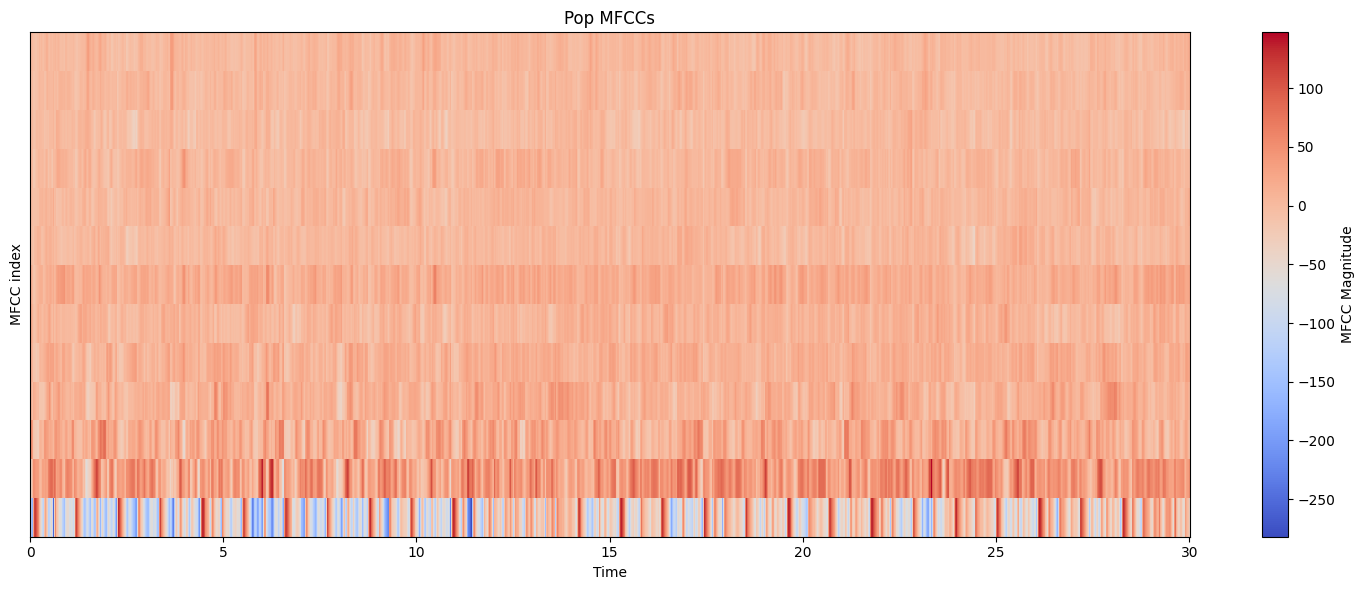

In [8]:
# Plot Pop MFCCs
plot_mfccs(audiopath=pop_files[1], genre="Pop")

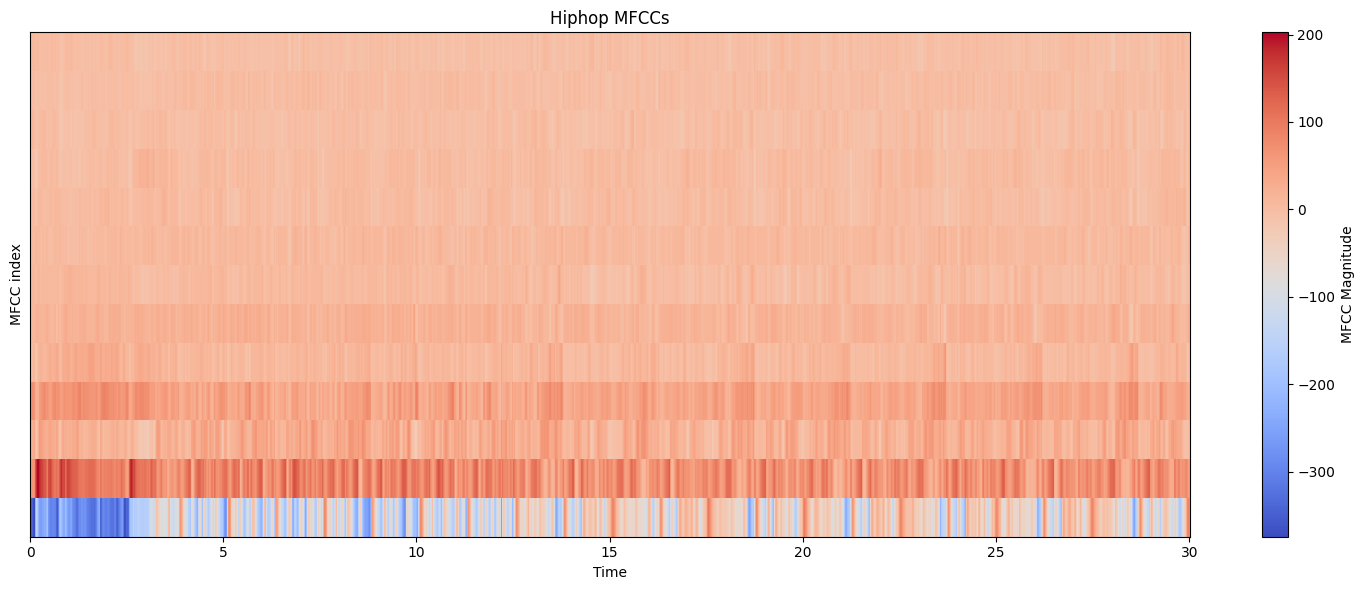

In [9]:
# Plot Hiphop MFCCs
plot_mfccs(audiopath=hiphop_files[0], genre="Hiphop")

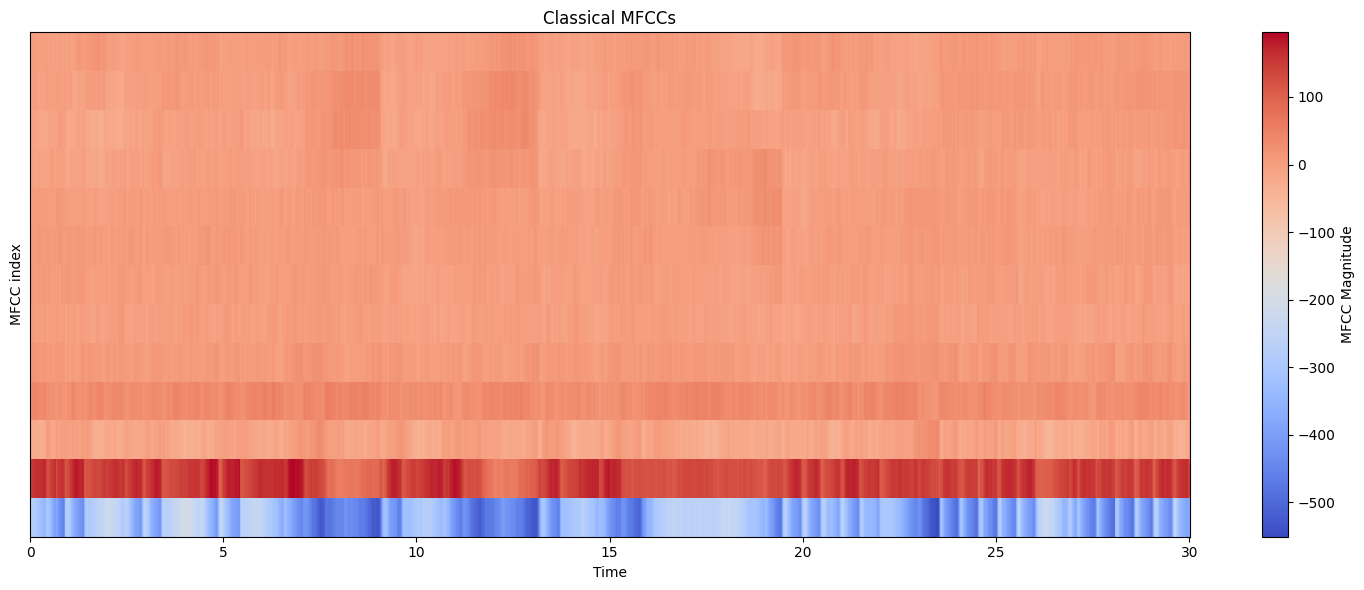

In [10]:
# Plot Classical MFCCs
plot_mfccs(audiopath=classical_files[0], genre="Classical")

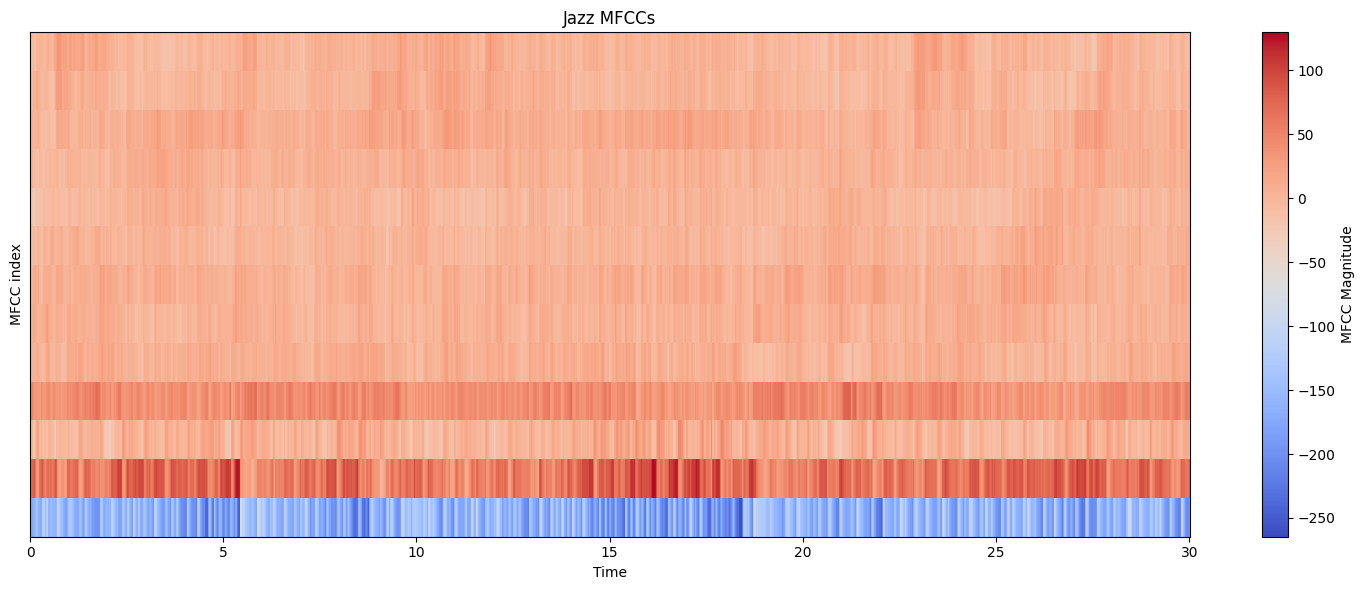

In [11]:
# Plot Jazz MFCCs
plot_mfccs(audiopath=jazz_files[1], genre="Jazz")

**Notes**
- I've tried different audio files of same genre. Noticed that the pattern is similar on every file
- Patterns are unique to every genre
- In a genre, although some are to an extreme, the patterns are generally the same

<div style="text-align:center; font-size: 30px">CHROMA FEATURES</div>

In [12]:
# chroma_stft plot function
def plot_chroma_stft(audiopath, genre):
    # Load file
    y, sr = librosa.load(audiopath, sr=None)
    # Instatiate chroma_stft
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    # Plot
    plt.figure(figsize=(15,6))
    librosa.display.specshow(chroma_stft, y_axis="chroma", x_axis="time", hop_length=512)
    plt.title(f"{genre} Chromagram")
    plt.colorbar()
    plt.tight_layout()
    plt.show()
    # Summary stats
    for i, v in enumerate(chroma_stft):
        print(f"Bin_{i} mean: {np.mean(v)}, std: {np.std(v)}")

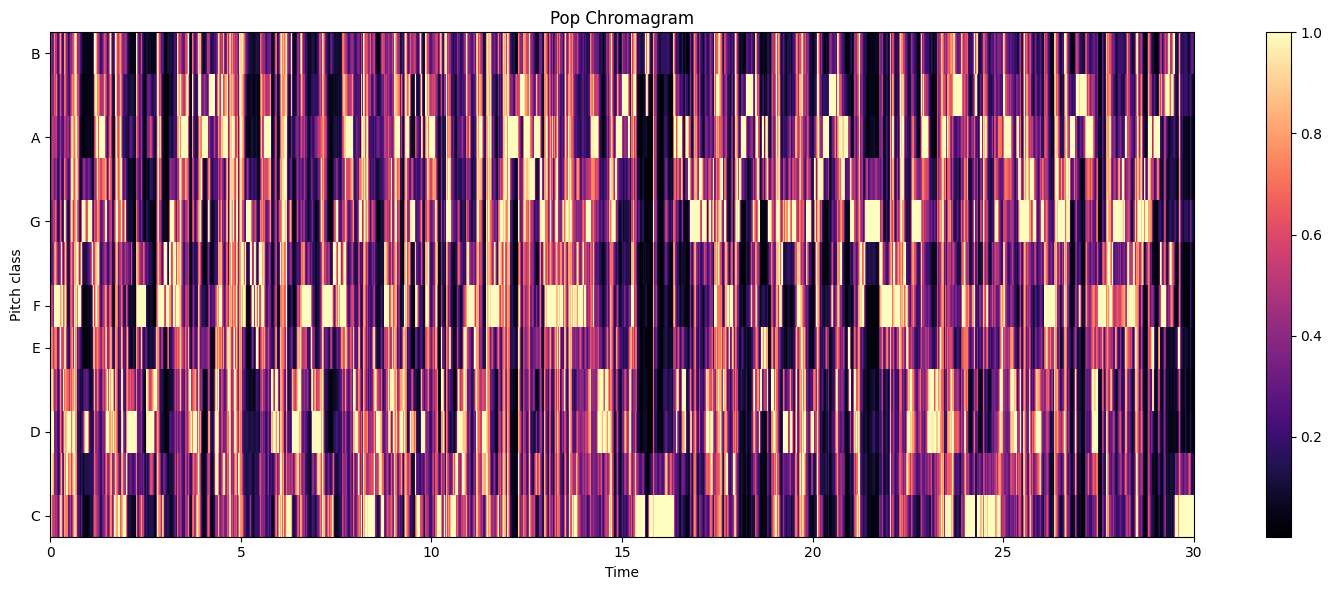

Bin_0 mean: 0.4543764293193817, std: 0.31220701336860657
Bin_1 mean: 0.41095203161239624, std: 0.25223398208618164
Bin_2 mean: 0.4789232909679413, std: 0.3259471356868744
Bin_3 mean: 0.4470202922821045, std: 0.29930379986763
Bin_4 mean: 0.411027729511261, std: 0.26730313897132874
Bin_5 mean: 0.4932430386543274, std: 0.34465622901916504
Bin_6 mean: 0.42267781496047974, std: 0.2922990918159485
Bin_7 mean: 0.5059919953346252, std: 0.32841789722442627
Bin_8 mean: 0.4458830654621124, std: 0.2859272062778473
Bin_9 mean: 0.4793221056461334, std: 0.3310226500034332
Bin_10 mean: 0.425944447517395, std: 0.30593857169151306
Bin_11 mean: 0.367247998714447, std: 0.26441434025764465


In [13]:
# Pop chromagram
plot_chroma_stft(pop_files[1], genre="Pop")

In [14]:
# chroma_cens plot function
def plot_chroma_cens(audiopath, genre):
    # Load file
    y, sr = librosa.load(audiopath, sr=None)
    # Instatiate chroma_cens
    chroma_cens = librosa.feature.chroma_cens(y=y, sr=sr)
    # Plot
    plt.figure(figsize=(15,6))
    librosa.display.specshow(chroma_cens, y_axis="chroma", x_axis="time", hop_length=512)
    plt.title(f"{genre} Chroma CENS")
    plt.colorbar()
    plt.tight_layout()
    plt.show()
    # Summary stats
    for i, v in enumerate(chroma_cens):
        print(f"Bin_{i} mean: {np.mean(v)}, std: {np.std(v)}")

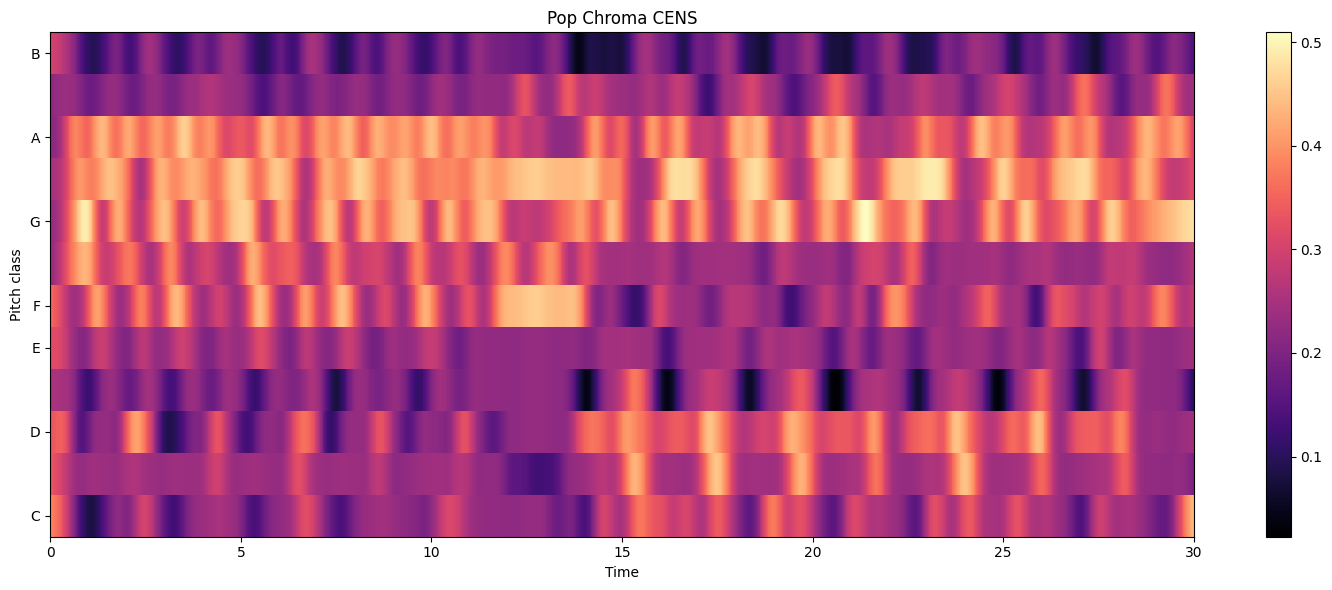

Bin_0 mean: 0.2431260198354721, std: 0.0598713755607605
Bin_1 mean: 0.2606726884841919, std: 0.0585007518529892
Bin_2 mean: 0.2858421802520752, std: 0.0782991424202919
Bin_3 mean: 0.20295950770378113, std: 0.06833277642726898
Bin_4 mean: 0.23111620545387268, std: 0.03101700358092785
Bin_5 mean: 0.29210764169692993, std: 0.07734910398721695
Bin_6 mean: 0.2779834270477295, std: 0.05132383108139038
Bin_7 mean: 0.36763477325439453, std: 0.06454809755086899
Bin_8 mean: 0.38584449887275696, std: 0.06623110920190811
Bin_9 mean: 0.3528779447078705, std: 0.06017061322927475
Bin_10 mean: 0.23289866745471954, std: 0.04523015022277832
Bin_11 mean: 0.16429899632930756, std: 0.051276616752147675


In [15]:
# Pop chroma_cens plot
plot_chroma_cens(pop_files[1], genre="Pop")

In [16]:
# chroma_cqt plot function
def plot_chroma_cqt(audiopath, genre):
    # Load file
    y, sr = librosa.load(audiopath, sr=None)
    # Instatiate chroma_cens
    chroma_cqt = librosa.feature.chroma_cqt(y=y, sr=sr)
    # Plot
    plt.figure(figsize=(15,6))
    librosa.display.specshow(chroma_cqt, y_axis="chroma", x_axis="time", hop_length=512)
    plt.title(f"{genre} Chroma CQT")
    plt.colorbar()
    plt.tight_layout()
    plt.show()
    # Summary stats
    for i, v in enumerate(chroma_cqt):
        print(f"Bin_{i} mean: {np.mean(v)}, std: {np.std(v)}")

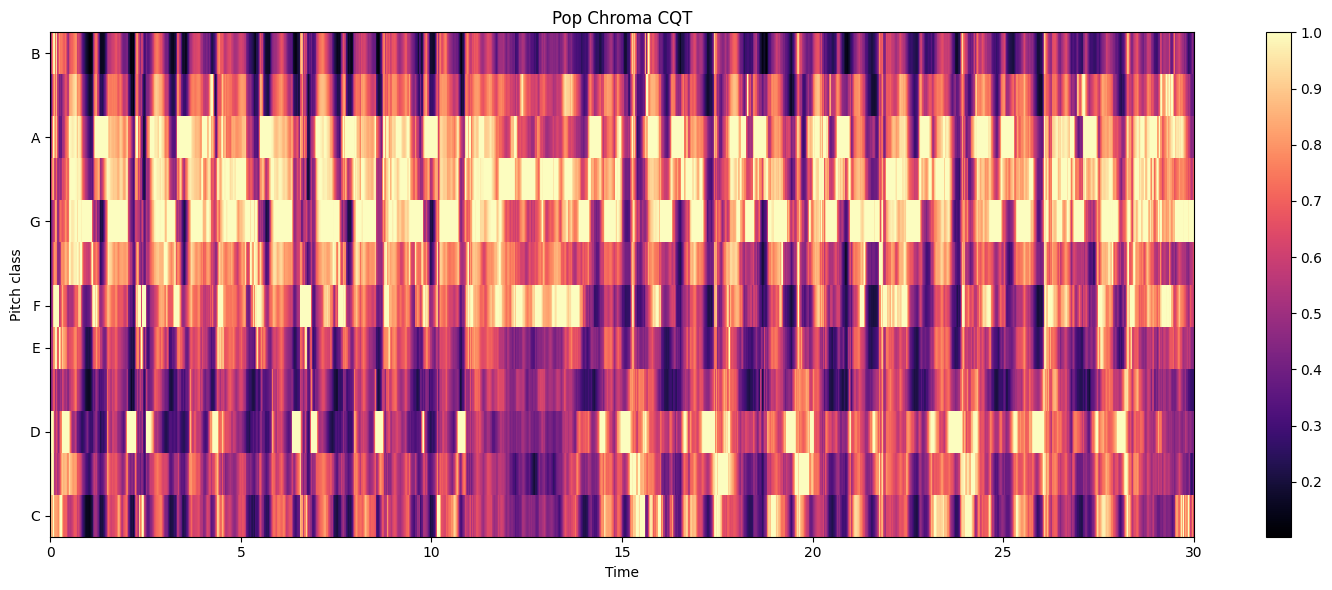

Bin_0 mean: 0.5728756189346313, std: 0.20882020890712738
Bin_1 mean: 0.590621292591095, std: 0.16948768496513367
Bin_2 mean: 0.6287772059440613, std: 0.21278899908065796
Bin_3 mean: 0.49979302287101746, std: 0.16084755957126617
Bin_4 mean: 0.5440969467163086, std: 0.16239789128303528
Bin_5 mean: 0.6697667241096497, std: 0.2202359139919281
Bin_6 mean: 0.6775592565536499, std: 0.17681965231895447
Bin_7 mean: 0.7993731498718262, std: 0.21947678923606873
Bin_8 mean: 0.7942560315132141, std: 0.18784281611442566
Bin_9 mean: 0.7715456485748291, std: 0.20655030012130737
Bin_10 mean: 0.5986721515655518, std: 0.19253647327423096
Bin_11 mean: 0.44994664192199707, std: 0.16938191652297974


In [17]:
# Plot pop chroma_cqt
plot_chroma_cqt(pop_files[1], genre="Pop")

In [27]:
# Extraction loop
all_features = []
all_labels = []

for file_path, label in tqdm(file_list):
    try:
        features = extract_features(file_path) # Extract function
        # Add filename/label if needed
        features['filename'] = os.path.basename(file_path)
        features['label'] = label
        all_features.append(features)
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        # Optionally log errors to a file

feature_df = pd.DataFrame(all_features)

 54%|█████████████████████▋                  | 541/1000 [06:19<05:22,  1.42it/s]/tmp/ipykernel_8837/788381460.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, _ = librosa.load(audio_path)
/home/kelvin/myenv/lib/python3.12/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error processing ../audio-ml/Data/genres_original/jazz/jazz.00054.wav: 


100%|███████████████████████████████████████| 1000/1000 [14:20<00:00,  1.16it/s]


In [34]:
# Save features in a csv file
feature_df.to_csv('audio_features.csv', index=False)